In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

The differential equation being solved is:

$\ddot{x} = -(\frac{1}{1-x} - \frac{1}{1+x})$

With initial conditions:
$x(0) = 0.999999$
$\dot{x}(0) = 0$

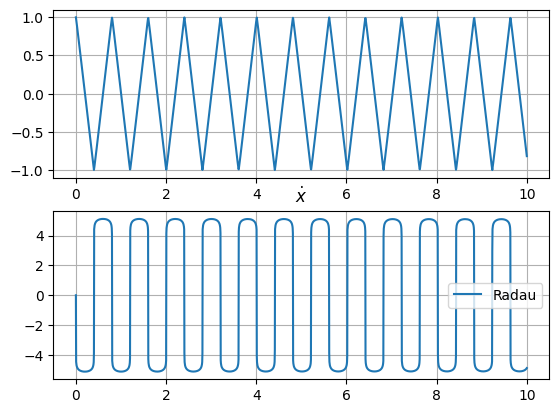

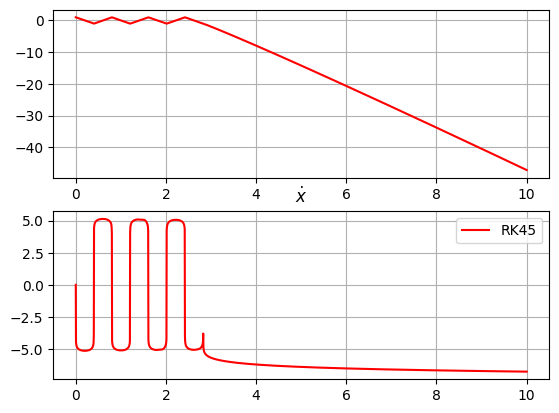

In [ ]:
# Differential equation for a particle between two fixed charges
# y represents position, ydot is velocity, yddot is acceleration
# Force is proportional to 1/(1-y) - 1/(1+y) representing Coulomb forces
def difeq(t, y):
    y, ydot = y
    yddot = -(1/(1 - y) - 1 / (1 + y))  # Negative sign since force is attractive
    return[ydot, yddot]

# Initial conditions - particle starts very close to right charge with zero velocity
y0 = [0.999999, 0]  # Position close to +1, zero initial velocity

# Time parameters for simulation
t_span = (0, 10)  # Simulate from t=0 to t=10
t_eval = np.linspace(0, 10, 2000)  # 2000 evenly spaced time points

# Solve the differential equation using Radau method (good for stiff problems)
solutionRad = solve_ivp(difeq, y0=y0, t_eval=t_eval, t_span=t_span, method="Radau")
# Runge Kutta 45 for comparison
solutionRK45 = solve_ivp(difeq, y0=y0, t_eval=t_eval, t_span=t_span, method="RK45")

# Plot position vs time
plt.subplot(2, 1, 1)
plt.plot(solutionRad.t, solutionRad.y[0], label = "Radau")
plt.grid()

# Plot velocity vs time 
plt.subplot(2, 1, 2)
plt.plot(solutionRad.t, solutionRad.y[1],  label = "Radau")
plt.title(r"$\dot{x}$")  # Velocity
plt.grid()
plt.legend()
plt.show()


plt.subplot(2, 1, 1)
plt.plot(solutionRK45.t, solutionRK45.y[0], color = "red" , label = "RK45")
plt.grid()

# Plot velocity vs time 
plt.subplot(2, 1, 2)
plt.plot(solutionRK45.t, solutionRK45.y[1], color = "red", label = "RK45")
plt.title(r"$\dot{x}$")  # Velocity
plt.grid()
plt.legend()
plt.show()

Dampened pendulum.
2nd order DE being solved:

$\ddot{\theta} = -\frac{c}{m} \dot{\theta} - \frac{g}{L} \sin(\theta)$

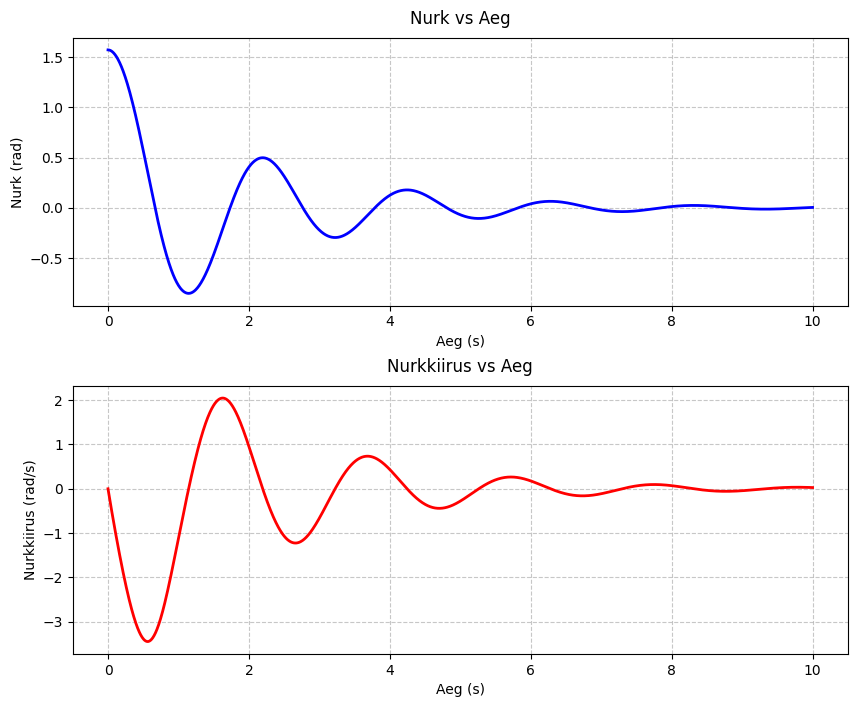

In [ ]:
# Parameters and constants
c = 2
m = 2
g = 9.8
L = 1

# 2nd order DE can be reduced into 2nd order DE system with first order DE-s
def dampened(t, y):
    theta, thetadot = y
    w = thetadot
    wdot = -c/m * w - g/L * np.sin(theta)
    return [w, wdot]


# Initial conditions: angle = pi/2 rad, angular velocity = 0
y0 = [np.pi/2, 0]
t_span = (0, 10)
t_eval = np.linspace(0, 10, 2000)


# Initial condition: water height = 3m
sol = solve_ivp(dampened, y0=y0, t_eval=t_eval, t_span=t_span, method="RK45")

plt.figure(figsize=(10, 8))
plt.subplots_adjust(hspace=0.3)

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'b-', linewidth=2)
plt.title("Nurk vs Aeg", fontsize=12, pad=10)
plt.xlabel("Aeg (s)", fontsize=10)
plt.ylabel("Nurk (rad)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.plot(sol.t, sol.y[1], 'r-', linewidth=2)
plt.title("Nurkkiirus vs Aeg", fontsize=12, pad=10)
plt.xlabel("Aeg (s)", fontsize=10)
plt.ylabel("Nurkkiirus (rad/s)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# Water Tank Problem

The water height in a tank is modeled by the following differential equation:

$\frac{dh}{dt} = \frac{1}{\rho A}[K_1 + K_2\cos(\frac{\pi t}{12}) - \rho A_{pipe}\sqrt{2gh}]$

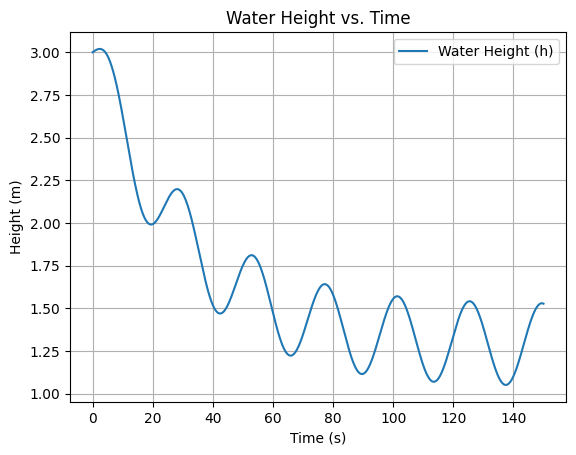

In [ ]:
# Problem adapted from "Numerical Methods for Engineers and Scientists" by Amos Gilat and Vish Subramaniam
# Models water height in a tank with:
# - Constant inflow (K1)
# - Periodic inflow (K2*cos(πt/12)) 
# - Outflow through a pipe (proportional to sqrt(2gh))

# Constants
rho = 1000       # kg/m^3 (density of water)
K1 = 300         # N/m^2 (constant inflow rate)
K2 = 200         # N/m^2 (amplitude of periodic inflow)
g = 9.81         # m/s^2 (gravitational acceleration)
Atank = 3.13     # m^2 (cross-sectional area of tank)
Apipe = 0.06     # m^2 (cross-sectional area of pipe)

def _difeq(t, y):
    """
    Differential equation for water height:
    dh/dt = (1/ρA)[K1 + K2cos(πt/12) - ρApipe√(2gh)]
    where:
    - First term represents constant inflow
    - Second term represents periodic inflow
    - Third term represents outflow (Torricelli's law)
    """
    h = max(y[0], 0)  # Ensure h >= 0
    hdot = (1 / (rho * Atank)) * (K1 + K2 * np.cos(np.pi * t / 12) - rho * Apipe * np.sqrt(2 * g * h))
    return [hdot]

y0 = [3]

# Time span and evaluation points
t_span = (0, 150)  # Simulate for 150 seconds
t_eval = np.linspace(0, 150, int(150 / 0.1))  # Evaluate every 0.1 seconds

# Solve using RK23 method (Bogacki-Shampine)
sol2 = solve_ivp(_difeq, t_span=t_span, y0=y0, t_eval=t_eval, method="RK23")

# Plot results
plt.grid()
plt.plot(sol2.t, sol2.y[0], label="Water Height (h)")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.title("Water Height vs. Time")
plt.show()